In [1]:
#importar librerias
import pandas as pd
import numpy as np
import warnings
import re
import matplotlib.pyplot as plt

In [2]:
#importar la base de datos desde el archivo .csv 
attacks = pd.read_csv('data/attacks.csv', encoding = 'ISO-8859-1', sep=',')

In [3]:
#Entender cuantas filas y columnas tiene la tabla
attacks.shape

(25723, 24)

In [4]:
#información general de la tabla, columnas y tipos de datos
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
#ver cuántos nulos hay en cada columna 
attacks.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [6]:
#se ve que hay muchas filas que tienen sus valores nulos, quiero saber el indice de estas
rows_with_nan = [index for index, row in attacks.iterrows() if row.isnull().all()]

In [7]:
print(len(rows_with_nan)) #hay 17020 filas que todos sus valores son nulos

17020


In [8]:
#se eliminan filas que todos sus valores son nulos

attacks_row_null = attacks.dropna(how='all')

print("Shape de tabla original: ",attacks.shape)
print("Shape de tabla sin filas de nulos: ",attacks_row_null.shape)

Shape de tabla original:  (25723, 24)
Shape de tabla sin filas de nulos:  (8703, 24)


In [9]:
#ver cuántos nulos hay en cada columna en la nueva tabla
attacks_row_null.isna().sum()

Case Number                  1
Date                      2401
Year                      2403
Type                      2405
Country                   2451
Area                      2856
Location                  2941
Activity                  2945
Name                      2611
Sex                       2966
Age                       5232
Injury                    2429
Fatal (Y/N)               2940
Time                      5755
Species                   5239
Investigator or Source    2418
pdf                       2401
href formula              2402
href                      2401
Case Number.1             2401
Case Number.2             2401
original order            2394
Unnamed: 22               8702
Unnamed: 23               8701
dtype: int64

In [10]:
#vemos la tabla
attacks_row_null

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Hay muchas filas que tienen un 0 en la primera columna y las otras columnas son todas nulas
#Se eliminan filas que tienen más del 50% de columnas con valores nulos (>12 columnas)

attacks_50_null = attacks_row_null.copy()

for index, row in attacks_50_null.iterrows():
    is_nan_series = row.isnull()
    if list(is_nan_series).count(True)>(attacks_50_null.shape[1]*.50):
        attacks_50_null.drop([index], inplace=True)

attacks_50_null.reset_index(inplace=True, drop = True)

In [12]:
print("Shape de tabla inicial: ",attacks.shape)
print("Shape de tabla sin filas de nulos: ",attacks_row_null.shape)
print("Shape de tabla sin filas con más de 50% nulos: ",attacks_50_null.shape)

Shape de tabla inicial:  (25723, 24)
Shape de tabla sin filas de nulos:  (8703, 24)
Shape de tabla sin filas con más de 50% nulos:  (6302, 24)


In [13]:
#ya se eliminaron todas las filas con más de 50% de valores nulos, ahora vamos a verificar las columnas
attacks_50_null.isna().sum()

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [14]:
#el total de filas de la tabla es de 6302 y vemos que hay dos columnas con 6300 y 6301 valor nulos.
#se van a eliminar las columnas que tengan más del 80% de nulos

columns_null = []

for index, row in attacks_50_null.T.iterrows():
    is_nan_series = row.isnull()
    if list(is_nan_series).count(True)>(attacks_50_null.shape[0]*.80):
        columns_null.append(index)
        
print("se van a eliminar las columnas: ",columns_null)       
attacks_50_null.drop(columns_null, axis=1, inplace = True)

se van a eliminar las columnas:  ['Unnamed: 22', 'Unnamed: 23']


In [15]:
#ya se tiene la tabla limpia de columnas y filas vacias
attacks_no_null = attacks_50_null.copy()

In [16]:
attacks_no_null

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [17]:
#Vamos a verificar qué otras columnas tienen muchos nulos y qué hacer con ellas
attacks_no_null.isna().sum()

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
dtype: int64

In [18]:
#Creamos una nueva columna para organizar los datos de la columna "time"
attacks_no_null["Time_classified"] = attacks_no_null["Time"].copy()

In [19]:
#Funciones para clasificar la columna "Time"

def time(hora):
    try:
        if hora >= 0 and hora < 6:
            return "00h00 - 06h00"
        elif hora >= 6 and hora < 12:
            return "06h00 - 12h00"
        elif hora >= 12 and hora < 18:
            return "12h00 - 18h00"
        elif hora >= 18 and hora < 24:
            return "18h00 - 24h00"
        else:
            #print("otra hora",hora)
            return "No specific time"
    except:
        #print("error: ",hora, type(hora))
        return "No specific time"
    
    
def time_classification(x):
    try:
        hora = int(x["Time"][0:2])
        #print("ingresa Num: ",hora)
        periodo = time(hora)
        return periodo
    except:
        #print("ingresa Str: ",x["Time"])
        if x["Time"] == x["Time"]:
            if re.search("\w+orning.*", x["Time"]) or re.search("[Aa].{0,1}[Mm]", x["Time"]):
                return "06h00 - 12h00" 
            elif re.search("\w+fter\s*no.*", x["Time"]) or re.search("[Pp].{0,1}[Mm]", x["Time"]) or re.search("[Mm]id", x["Time"]):
                return "12h00 - 18h00"
            elif re.search("\w+igh.*", x["Time"]) or re.search("[Ee]ve", x["Time"]) or re.search("[Dd]u", x["Time"]):
                return "18h00 - 24h00"
            elif re.search("\d\d\D+", x["Time"]):
                hora = re.findall("\d\d",x["Time"])
                periodo = time(int(hora[0]))
                return periodo
            else:
                #print("Otro: ",x["Time"])
                return "No specific time"
        else:
            return "No specific time"

In [20]:
#Vamos a reemplazar las horas por periodos del día

attacks_no_null["Time_classified"] = attacks_no_null.apply(lambda x: time_classification(x), axis = 1)


In [21]:
#Verificamos las primeras filas
attacks_no_null[["Time","Time_classified"]].head()

,Time,Time_classified
0,18h00,18h00 - 24h00
1,14h00 -15h00,12h00 - 18h00
2,07h45,06h00 - 12h00
3,NaN,No specific time
4,NaN,No specific time


In [22]:
#contamos los valores de la columna "Time_classified"
attacks_no_null["Time_classified"].value_counts()

No specific time    3387
12h00 - 18h00       1587
06h00 - 12h00        930
18h00 - 24h00        353
00h00 - 06h00         45
Name: Time_classified, dtype: int64

In [23]:
#La siguiente columna a limpiar va a ser "Species"
#El nombre de la columna tiene un espacio extra, hacemos el cambio
attacks_no_null.rename(columns={'Species ': 'Species'}, inplace = True)

In [24]:
#Creamos una nueva columna para organizar los datos de la columna "Species"
attacks_no_null["Species_classified"] = attacks_no_null["Species"].copy()

In [25]:
#palabras que se quiere eliminar de la columna
stop = ["Possibly","for","no","fragments","larger","less","than","by",
        "determined","adult","male","hooked","captured","involved","cm",
        "feet","female","tooth", "fragment", "recovered","according", 
        "witnesses","said","be","averaged","length","pack","of","seen", 
        "in", "vicinity",'',"kg","lb","small","a","m","thought", "to", 
        "involve","possibly", "juvenile","suspected", "due", "freshwater", 
        "habitat"]

#Función para clasificar la columna "Species"
def species_classification(x):
    #verifica si es NaN o no
    if x["Species"] == x["Species"]:
        especie_div = x["Species"].split()
        especie_stop = []
        #elimina carácteres especiales
        for i in especie_div:
            x = i.lower()
            x = re.sub("[^a-zA-Z]", "", x)
            x = x.replace("sharks","shark")
            #elimina palabras que esten en la lista de stop words
            if x not in stop:
                especie_stop.append(x.lower())
        #genera el nuevo string a validar
        especie = " ".join(especie_stop).capitalize()
        #validación extra para strings con muchas palabras
        if "shark" in especie_stop:
            i_shark = especie_stop.index("shark")
            if len(especie_stop)>2:
                especie_alt = (especie_stop[i_shark-2]+" "+especie_stop[i_shark-1] +" "+ especie_stop[i_shark]).capitalize()
            else:
                especie_alt = (especie_stop[i_shark-1] +" "+ especie_stop[i_shark]).capitalize()
        else:
            especie_alt = "Other species"
            
        #validaciones de las categorias más comunes
        if len(especie) == 0:
            return "Not confirmed"
        elif re.search("[Nn]ot", especie) or re.search(".*un.*", especie) or re.search(".*[Qq]ue.*", especie) or re.search("[Uu]ni", especie) or especie == "Shark":
            return "Not confirmed"
        elif re.search("[Ii]nvalid", especie) or re.search("No shark involvement", especie):
            return "No shark involvement"
        elif re.search("[Ww]hite\s", especie):
            return "White shark"
        elif re.search("[Tt]ig", especie):
            return "Tiger shark"
        elif re.search("[Ss]pin", especie):
            return "Spinner shark"
        else:
            return especie_alt
    else:
        return "Not confirmed"

In [26]:
#Vamos a clasificar las especies

attacks_no_null["Species_classified"] = attacks_no_null.apply(lambda x: species_classification(x), axis = 1)

In [27]:
#contamos los valores de la columna "Time_classified"
attacks_no_null["Species_classified"].value_counts().head(10)

Not confirmed           4179
White shark              628
Tiger shark              281
Bull shark               159
No shark involvement     103
Bronze whaler shark       60
Blacktip shark            55
Nurse shark               49
Spinner shark             48
Wobbegong shark           44
Name: Species_classified, dtype: int64

In [28]:
#Verificamos las primeras filas de "Species"
attacks_no_null[["Species","Species_classified"]].head(10)

,Species,Species_classified
0,White shark,White shark
1,NaN,Not confirmed
2,NaN,Not confirmed
3,2 m shark,Not confirmed
4,"Tiger shark, 3m",Tiger shark
5,NaN,Not confirmed
6,Tiger shark,Tiger shark
7,"Lemon shark, 3'",Lemon shark
8,"Bull shark, 6'",Bull shark
9,NaN,Not confirmed


In [29]:
#La siguiente columna a limpiar va a ser "Age"
#Creamos una nueva columna para organizar los datos de la columna "Ages"
attacks_no_null["Age_classified"] = attacks_no_null["Age"].copy()

In [30]:
#Función para clasificar la columna "Age"
def age_classification(x):
    if x["Age"] == x["Age"]:
        age = x["Age"]
        
        #quitamos caracteres que no sean números
        age = re.sub("[^0-9]", " ", age)
        age = list(map(int, age.split())) 
        
        #verificamos cuántos números vienen en la edad
        if len(age) == 0:
            return "No record"
        elif len(age) == 1:
            age = age[0]
        else:
            age = round(sum(age)/len(age))
        
        #clasificamos la edad en rangos
        if age <= 10:
            return "0 - 10"
        elif age <= 20:
            return "11 - 20"
        elif age <= 30:
            return "21 - 30"
        elif age <= 40:
            return "31 - 40"
        elif age <= 50:
            return "41 - 50"
        elif age <= 60:
            return "51 - 60"
        elif age <= 70:
            return "61 - 70"
        elif age <= 80:
            return "71 - 80"
        else:
            return "81 or more"
    else:
        return "No record"
    

In [31]:
#Vamos a clasificar las edades

attacks_no_null["Age_classified"] = attacks_no_null.apply(lambda x: age_classification(x), axis = 1)

In [32]:
attacks_no_null["Age_classified"].value_counts()

No record     2861
11 - 20       1192
21 - 30        948
31 - 40        525
41 - 50        331
0 - 10         179
51 - 60        178
61 - 70         67
71 - 80         16
81 or more       5
Name: Age_classified, dtype: int64

In [33]:
#La siguiente columna a limpiar va a ser "Year"
#Creamos una nueva columna para organizar los datos de la columna
attacks_no_null["Year_classified"] = attacks_no_null["Year"].copy()

In [34]:
#Función para limpiar la columna de años

def year_classification(x):
    if x["Year"] == x["Year"]:
        year = int(x["Year"])
        if len(str(year))<4:
            return "No record"
        else:
            return year
    else:
        return "No record"
    

In [35]:
#llamamos a función que  limpia los años
attacks_no_null["Year_classified"] = attacks_no_null.apply(lambda x: year_classification(x), axis = 1)

In [36]:
#Resumen de años
attacks_no_null["Year_classified"].value_counts()

2015         143
2017         136
2016         130
No record    130
2011         128
            ... 
1788           1
1787           1
1786           1
1785           1
1543           1
Name: Year_classified, Length: 246, dtype: int64

In [37]:
'''La siguiente columna a limpiar va a ser "Date". Dado que ya tenemos otra columna con el año,
en está columna me interesa saber el mes del ataque.
Creamos una nueva columna para organizar los datos de mes de la columna'''

attacks_no_null["Month_classified"] = attacks_no_null["Date"].copy()

In [38]:
#Función para limpiar la columna de meses

def month_classification(x):
    months_dict = {"[Jj]an":"January",
                   "[Ff]eb":"February",
                   "[Mm]ar":"March",
                   "[Aa]pr":"April",
                   "[Mm]ay":"May",
                   "[Jj]un":"June",
                   "[Jj]ul":"July",
                   "[Aa]ug":"August",
                   "[Ss]ep":"September",
                   "[Oo]ct":"October",
                   "[Nn]ov":"November",
                   "[Dd]ec":"December"}
    if x["Date"] == x["Date"]:
        month = x["Date"]
        for key, value in months_dict.items():
            if re.search(key, month):
                #print(month,value)
                return value
        return "No record"
    else:
        return "No record"

In [39]:
#llamamos a función que  limpia los años
attacks_no_null["Month_classified"] = attacks_no_null.apply(lambda x: month_classification(x), axis = 1)

In [40]:
#Resumen de meses
attacks_no_null["Month_classified"].value_counts()

July         671
August       602
September    555
No record    519
January      519
June         497
April        455
October      445
December     438
March        413
November     408
May          398
February     382
Name: Month_classified, dtype: int64

In [41]:
#La siguiente columna a limpiar va a ser "Type".
#Creamos una nueva columna para organizar los datos de la columna

attacks_no_null["Type_classified"] = attacks_no_null["Type"].copy()

In [42]:
#Función para limpiar la columna de meses

def type_classification(x):
    if x["Type"] == x["Type"]:
        type = x["Type"]
        if re.search("[Bb]oat", type):
                return "Not specified"
        else:
            return type
    else:
        return "Not specified"

In [43]:
#llamamos a función que  limpia los tipos de ataques
attacks_no_null["Type_classified"] = attacks_no_null.apply(lambda x: type_classification(x), axis = 1)

In [44]:
#Resumen de Type
attacks_no_null["Type_classified"].value_counts()

Unprovoked       4595
Provoked          574
Invalid           547
Not specified     345
Sea Disaster      239
Questionable        2
Name: Type_classified, dtype: int64

In [45]:
#La siguiente columna a limpiar va a ser "Country".
#Creamos una nueva columna para organizar los paises de la columna

attacks_no_null["Country_classified"] = attacks_no_null["Country"].copy()

In [46]:
#Palabras a quitar de la columna
stop = ["uae","between","federated", "states", "of","bay","coast","overseas","territory","territories"]

#Función para limpiar la columna de paises
def country_classification(x):
    if x["Country"] == x["Country"]:
        country = x["Country"].strip().lower()
        country = re.sub("[^a-zA-Z &\\/]", "", country)
        if "/" in country:
            country = country.split("/")
            country = country[0]
        country_lst = country.split()
        country_stop = []
        for i in country_lst:
            if i not in stop:
                country_stop.append(i.capitalize())
        country = " ".join(country_stop)
        return country_verification(country)
    else:
        return "Not specified"
    
#Funcion para verificar regex en paises
def country_verification(country):
    countries_dict = {"[Oo]cean":"Not specified",
                      "[Ss]ea":"Not specified",
                      "^[Aa]frica$":"Country in Africa",
                      "[Aa]ndaman": "Andaman Islands",
                      "[Cc]eylon": "Sri Lanka",
                      "[Aa]sia":"Country in Asia"
                     }
    for key, value in countries_dict.items():
        if re.search(key, country):
            return value
    return country

In [47]:
#llamamos a función que limpia los paises
attacks_no_null["Country_classified"] = attacks_no_null.apply(lambda x: country_classification(x), axis = 1)

In [48]:
#Resumen de Country
attacks_no_null["Country_classified"].value_counts()

Usa                  2229
Australia            1338
South Africa          579
Not specified         146
Papua New Guinea      134
                     ... 
Reunion Island          1
Western Samoa           1
Bangladesh              1
Equatorial Guinea       1
Cyprus                  1
Name: Country_classified, Length: 170, dtype: int64

In [49]:
#La siguiente columna a limpiar va a ser "Activity".
#Creamos una nueva columna para organizar las actividades

attacks_no_null["Activity_classified"] = attacks_no_null["Activity"].copy() 

In [50]:
#Función para limpiar la columna de actividades
def activity_classification(x):
    if x["Activity"] == x["Activity"]:
        activity = x["Activity"].strip().lower()
        activity = re.sub("[^a-zA-Z \\/]", "", activity)
        activity = activity.split()
        verbs = []
        for i in activity:
            txt = re.findall(".*ing", i)
            if len(txt)>=1:
                verbs.append(txt[0])
        if len(verbs)>=1:
            if "shark" in activity or "sharks" in activity:
                act = verbs[0]+" sharks"
                #print("tibu: ",act,"... original:",x["Activity"])
                return act.capitalize()
            else:
                #print("Actividad:",verbs[0],"... original:",x["Activity"])
                return verbs[0].capitalize()
        else:
            #print("Sin Act:",x["Activity"])
            return "Not specified"
    else:
        return "Not specified"

In [51]:
#llamamos a función que limpia las actividades
attacks_no_null["Activity_classified"] = attacks_no_null.apply(lambda x: activity_classification(x), axis = 1)

In [52]:
#Resumen de Activity
attacks_no_null["Activity_classified"].value_counts()

Swimming         1095
Surfing          1080
Not specified     948
Fishing           648
Diving            511
                 ... 
Painting            1
Kakaying            1
Skimboarding        1
Lobstering          1
Shrimping           1
Name: Activity_classified, Length: 238, dtype: int64

In [53]:
#La siguiente columna a limpiar va a ser "Sex".
#El nombre de la columna tiene un espacio extra, hacemos el cambio
attacks_no_null.rename(columns={'Sex ': 'Sex'}, inplace = True) 

In [54]:
#Creamos una nueva columna para organizar el genero
attacks_no_null["Sex_classified"] = attacks_no_null["Sex"].copy()

In [55]:
#Función para limpiar la columna de genero
def sex_classification(x):
    if x["Sex"] == x["Sex"]:
        gender = x["Sex"]
        if re.search("[Mm]", gender):
            return "M"
        elif re.search("[Ff]", gender):
            return "F"
        else:
            return "Not specified"
    else:
        return "Not specified"

In [56]:
#llamamos a función que limpia el genero
attacks_no_null["Sex_classified"] = attacks_no_null.apply(lambda x: sex_classification(x), axis = 1)

In [57]:
#Resumen de Sex (genero)
attacks_no_null["Sex_classified"].value_counts()

M                5096
F                 637
Not specified     569
Name: Sex_classified, dtype: int64

In [58]:
#La siguiente columna a limpiar va a ser "Fatal (Y/N)".
#Creamos una nueva columna para organizar la columna

attacks_no_null["Fatal_classified"] = attacks_no_null["Fatal (Y/N)"].copy() 

In [59]:
#Función para limpiar la columna de "Fatal"
def fatal_classification(x):
    if x["Fatal (Y/N)"] == x["Fatal (Y/N)"]:
        fatal = x["Fatal (Y/N)"]
        if re.search("[Yy]", fatal):
            return "Y"
        elif re.search("[Nn]", fatal):
            return "N"
        else:
            return "Not specified"
    else:
        return "Not specified"

In [60]:
#llamamos a función que limpia "Fatal"
attacks_no_null["Fatal_classified"] = attacks_no_null.apply(lambda x: fatal_classification(x), axis = 1)

In [61]:
#Resumen de "Fatal (Y/N)"
attacks_no_null["Fatal_classified"].value_counts()

N                4372
Y                1389
Not specified     541
Name: Fatal_classified, dtype: int64

In [62]:
#La siguiente columna a limpiar va a ser "Injury".
#Creamos una nueva columna para organizar la columna

attacks_no_null["Injury_classified"] = attacks_no_null["Injury"].copy() 

In [63]:
#Función para limpiar la columna de "Injury"
def injury_classification(x):
    if x["Injury"] == x["Injury"]:
        injury = x["Injury"].strip().lower()
        injury = re.sub("[^a-zA-Z ]", "", injury)
        return injury_verification(injury)
    else:
        return "Not specified"
    
#Funcion para verificar regex en injury
def injury_verification(injury):
    injury_dict = {"fatal":"Fatal",
                   "no injury":"No injury",
                   "bitten|right|left|injur|bite":"Body bite / injured",
                   "no.*details|surv|not|nonfatal":"Not specified",
                   "lacera|abra":"Body lacerations",
                   "severed|ampu":"Amputated limb",
                   "minor|punc":"Minor injury",
                   "drown":"Drowned"}
    for key, value in injury_dict.items():
        if re.search(key, injury):
            return value
    return "Not specified"

In [64]:
#llamamos a función que limpia "Injury"
attacks_no_null["Injury_classified"] = attacks_no_null.apply(lambda x: injury_classification(x), axis = 1)

In [65]:
#Resumen de injury
attacks_no_null["Injury_classified"].value_counts()

Body bite / injured    2577
Fatal                  1362
No injury               804
Body lacerations        662
Not specified           645
Amputated limb           88
Minor injury             83
Drowned                  81
Name: Injury_classified, dtype: int64

In [66]:
#La siguiente columna a limpiar va a ser "Name".
#Creamos una nueva columna para organizar los nombres

attacks_no_null["Name_classified"] = attacks_no_null["Name"].copy() 

In [67]:
stop = ["yacht", "owened", "by","launch","a","pilot","air","force","officer","royal","australian","skiff", "occupant","captain","occupants"]
name_dict = {"valet|atla|coa|dingh|teen|peo|passe|teac|male|boy|boat|child|anony|sailor|girl|unid|unkn|fish|div|native|sold|men$|wom|young|yout|crew":"Not confirmed"}

#Función para limpiar la columna de "Name"
def name_classification(x):
    if x["Name"] == x["Name"]:
        name = x["Name"].lower()
        name_lst = name.split(",")
        name_lst = name_lst[0].strip()
        name_lst = name_lst.split()
        name_stop = []
        for i in name_lst:
            if i not in stop:
                name_stop.append(i.capitalize())
        if len(name_stop) <2:
            return "Not confirmed"
        else:
            name = " ".join(name_stop)
            name = re.sub("[^a-zA-Z .]", "", name)
        for key, value in name_dict.items():
            if re.search(key, name.lower()):
                return value
        if len(name.split())<2:
            return "Not confirmed"
        else:
            return name
    else:
        return "Not confirmed"

In [68]:
#llamamos a función que limpia "Name"
attacks_no_null["Name_classified"] = attacks_no_null.apply(lambda x: name_classification(x), axis = 1)

In [69]:
#Resumen de name
attacks_no_null["Name_classified"].value_counts()

Not confirmed     1906
Andre Hartman        3
John Williams        3
Wayne Monk           2
Gabriel Botha        2
                  ... 
Kath. Oneill         1
Kor Van Helden       1
Joe Termini          1
David Silva          1
Brad Hibshman        1
Name: Name_classified, Length: 4357, dtype: int64

In [71]:
attacks_no_null.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Age_classified,Year_classified,Month_classified,Type_classified,Country_classified,Activity_classified,Sex_classified,Fatal_classified,Injury_classified,Name_classified
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,51 - 60,2018,June,Not specified,Usa,Paddling,F,N,No injury,Julie Wolfe
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,11 - 20,2018,June,Unprovoked,Usa,Standing,F,N,Body bite / injured,Adyson Mcneely
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,41 - 50,2018,June,Invalid,Usa,Surfing,M,N,Body bite / injured,John Denges


In [72]:
attacks_no_null.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Time_classified',
       'Species_classified', 'Age_classified', 'Year_classified',
       'Month_classified', 'Type_classified', 'Country_classified',
       'Activity_classified', 'Sex_classified', 'Fatal_classified',
       'Injury_classified', 'Name_classified'],
      dtype='object')

In [73]:
attacks_clean = attacks_no_null[["Case Number","Month_classified","Year_classified","Type_classified","Country_classified","Area","Location","Activity_classified","Name_classified","Sex_classified","Age_classified","Injury_classified","Fatal_classified","Time_classified","Species_classified","Investigator or Source","pdf","href formula","href","Case Number.1","Case Number.2","original order"]].copy() 

In [74]:
attacks_clean.fillna("Not specified", inplace = True)

In [75]:
attacks_clean.isna().sum()

Case Number               0
Month_classified          0
Year_classified           0
Type_classified           0
Country_classified        0
Area                      0
Location                  0
Activity_classified       0
Name_classified           0
Sex_classified            0
Age_classified            0
Injury_classified         0
Fatal_classified          0
Time_classified           0
Species_classified        0
Investigator or Source    0
pdf                       0
href formula              0
href                      0
Case Number.1             0
Case Number.2             0
original order            0
dtype: int64

In [76]:
attacks_clean.to_csv("data/attacks_clean.csv", index=False)

## Insights

### Fatal Attacks?

#### More than 63% of the attacks where not fatal

<AxesSubplot:ylabel='Fatal_classified'>

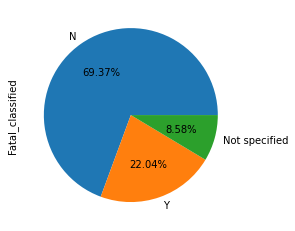

In [77]:
attacks_no_null["Fatal_classified"].value_counts().head().plot(kind = 'pie',autopct='%1.2f%%')

### The attack was provoked or not?

#### More than 72% of the attacks where unproovoked

<AxesSubplot:ylabel='Type_classified'>

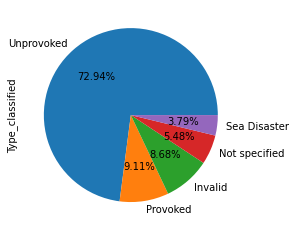

In [78]:
attacks_no_null["Type_classified"].value_counts().head().plot(kind = 'pie',autopct='%1.2f%%')

### Shark species:

#### The top 3 species with more attacks are the white shark, the tiger shark and the bull shark

<AxesSubplot:ylabel='Species_classified'>

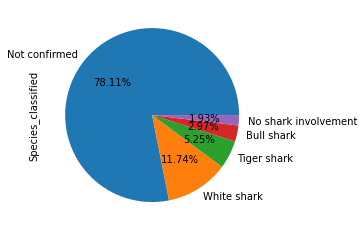

In [79]:
attacks_no_null["Species_classified"].value_counts().head().plot(kind = 'pie',autopct='%1.2f%%')

### Genres:

#### More than 80% of the victims were males

<AxesSubplot:ylabel='Sex_classified'>

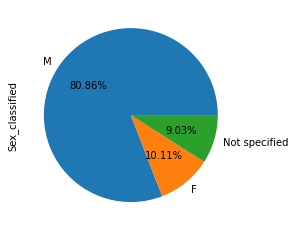

In [80]:
attacks_no_null["Sex_classified"].value_counts().head().plot(kind = 'pie',autopct='%1.2f%%')

### Ages of victims:

#### The age range between 11 - 20 years old had more attacks, followed by 21 - 30 and 31 - 40 years old.

<AxesSubplot:>

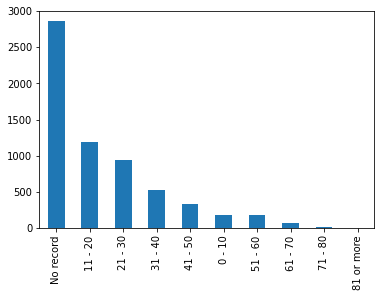

In [81]:
attacks_no_null["Age_classified"].value_counts().plot(kind = 'bar')

### Countries:

#### The top 3 countries with more attacks are: USA, Australia and South Africa

<AxesSubplot:>

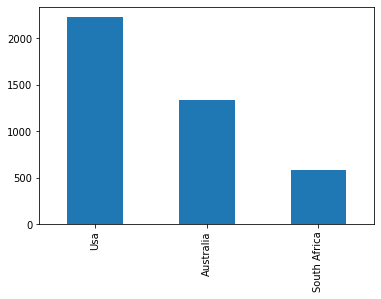

In [82]:
attacks_no_null["Country_classified"].value_counts().head(3).plot(kind = 'bar')

### Years:

#### 2015, 2017 and 2016 are the years with more shark attacks reported worldwide

<AxesSubplot:>

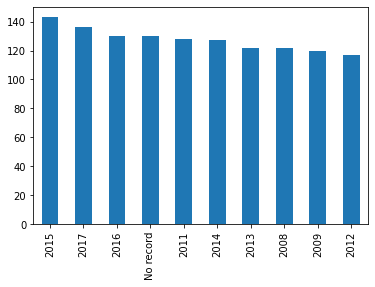

In [83]:
attacks_no_null["Year_classified"].value_counts().head(10).plot(kind = 'bar')

### Months:

#### July is the month with more attacks, followed by August and September

<AxesSubplot:>

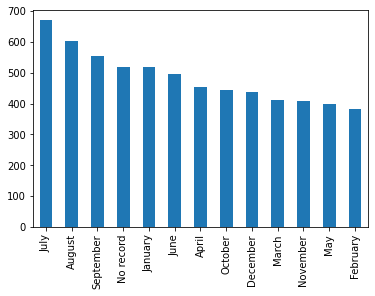

In [84]:
attacks_no_null["Month_classified"].value_counts().plot(kind = 'bar')

### Injuries:

#### Almost 43% of the attacks involved a body bite or injure, and 10.94% included body lacerations

<AxesSubplot:ylabel='Injury_classified'>

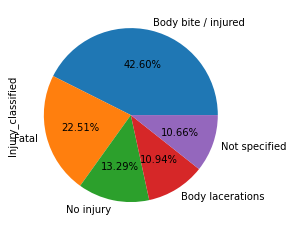

In [85]:
attacks_no_null["Injury_classified"].value_counts().head().plot(kind = 'pie',autopct='%1.2f%%')